In [1]:
import numpy as np
import plotly.graph_objs as go 
from ipywidgets import widgets
import matplotlib.pyplot as plt
import scipy.stats as spst


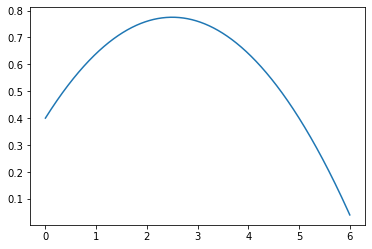

In [2]:
t=np.linspace(0,6,1000)
Lmbda_n=(-t**3 + 15*t**2/2 + 20*t)/50

 

lmbda_m=(-3*t*(t-5)+20)/50
plt.plot(t,lmbda_m)

In [46]:


next_arrival=widgets.Button(
    description="next arrival")

clear=widgets.Button(
    description="clear")



t=np.linspace(0,6,1000)
Lmbda_n=(-t**3 + 15*t**2/2 + 20*t)/50

arrival_t=np.array([])
homo_t=np.array([])

lmbda_m=np.max(-3*t*(t-5)+20)/50
tr=0
 

trace1=go.Scatter(x=t,y=Lmbda_n,name="\u039B(t)" ,mode="lines",line=dict(
    color="green", dash='dash',width=1),hoverinfo='skip')

trace2=go.Scatter(x=[0,6],y=[0,0],name="arrival times" ,mode="lines",line=dict(
    color="gray", dash='solid',width=10),hoverinfo='skip')

trace3=go.Scatter(x=[0,0],y=[0,5],name="expected number of arrivals  " ,mode="lines",line=dict(
    color="gray", dash='solid',width=10),hoverinfo='skip')

trace4=go.Scatter(x=[],y=[],name="arrivals" ,hoverinfo="skip", text="",mode="markers",marker=dict(
    color="blue", size=10))
trace5=go.Scatter(x=[],y=[],name="E(#arrivals)/homo arrival time" ,hoverinfo="skip", text="",mode="markers",marker=dict(
    color="yellow", size=10))
trace6=go.Scatter(x=[],y=[],name="" ,hoverinfo="text", text="",mode="markers",marker=dict(
    color="black", size=8))


g = go.FigureWidget(data=[trace1,trace2,trace3,trace4,trace5,trace6],
                    
                        layout=go.Layout(
                        hovermode="closest",
                            xaxis={'showspikes': True},
                            yaxis={'showspikes': True},
                        title=dict(
                        text="inversion method",
                        ),
                        
                        margin={'l': 0, 'r': 0, 't': 0, 'b': 0},width=800, height=300  )
                   )
 

g.update_layout( 
                     title_x=0.5,
                 title_y=0.9,
                  
                xaxis=dict(range=[-1,7] ),
                yaxis=dict(range=[-0.1,5]),
                 legend=dict(
                    x=1.1,
                    y=0.7,
                    traceorder="normal",
                    font=dict(
                        family="sans-serif",
                        size=12,
                        color="black"
                    ))
           
)
      
    
 
    
    
def response1(change):
    global tr,arrival_t, homo_t,next_proposal
 
    keep=False
    while keep==False:
        tr=tr-1/lmbda_m*np.log(np.random.rand())
        
        if tr>6:
            next_arrival.disabled=True 
            return
        ar=(-3*tr*(tr-5)+20)/lmbda_m/50
        keep=np.random.rand()<ar
    arrival_t=np.append(arrival_t,tr)
    
    homo_t=np.append(homo_t,(-tr**3 + 15*tr**2/2 + 20*tr)/50)
     
    with g.batch_update():
            g.data[3].y=np.repeat(0,len(arrival_t))
            g.data[3].x=arrival_t
            g.data[4].x=np.repeat(0,len(arrival_t))
            g.data[4].y=homo_t
            g.data[5].x=arrival_t
            g.data[5].y=homo_t
 
        
def response2(change):
    global  tr,arrival_t, homo_t,next_proposal,trace1,trace2,trace3,trace4,trace5,g
    tr=0
    arrival_t=np.array([])
    homo_t=np.array([])
    next_arrival.disabled=False
    with g.batch_update():
        g.data = [g.data[0]]
        g.add_trace(trace2)
        g.add_trace(trace3)
        g.add_trace(trace4)
        g.add_trace(trace5)
        g.add_trace(trace6)
        g.update_layout( 
                     title_x=0.5,
                 title_y=0.9,
                xaxis=dict(range=[-1,7] ),
                yaxis=dict(range=[-0.1,5]),
                 legend=dict(
                    x=1.1,
                    y=0.7,
                    traceorder="normal",
                    font=dict(
                        family="sans-serif",
                        size=12,
                        color="black"
                    ))
                   
        )

    
next_arrival.on_click(response1)
clear.on_click(response2)


container1 = widgets.HBox([next_arrival,clear]) 
 
widget1=widgets.HBox([g ])
Widget=widgets.VBox([container1,widget1] )
Widget